In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def poisson(l,k):
    return (l**k) * np.exp(-l) / np.math.factorial(k)

In [3]:
def trigger_bins(times):
    start = 8e-9
    a = [start]  # Incluir el valor inicial

    for _ in range(times):  # Generar 3 valores más
        a.append(a[-1] * 2)  # Duplicar el último valor

    return a

In [4]:
def background(w, t, dr, npmts, verbose=False):
    dark_noise_hits_in_one_pmt  = w * dr
    dark_noise_hits_in_all_pmts = dark_noise_hits_in_one_pmt * npmts
    if verbose:
        print(f"Dark Noise Hits In All PMTs: {dark_noise_hits_in_all_pmts}")

    p = 1 - np.sum([poisson(dark_noise_hits_in_all_pmts, i) for i in range(t)])
    if verbose:
        print(f"Probability of {t} dark noise hits (or more) in a {w*1e9:.0f} ns time window: {p}")

    dark_noise_hits_rate = p / w
    if verbose:
        print(f"Dark Noise Rate: {dark_noise_hits_rate:.2e} Hz")
    return dark_noise_hits_rate

In [5]:
dark_noise_rate   = 2000   #Hz
num_pmts          = 2000   #pmts

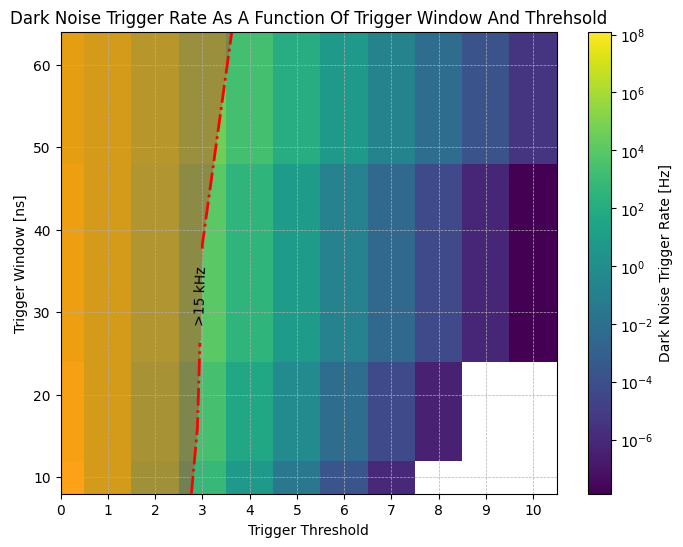

In [6]:
# Definir los valores de w y t
w_values = np.array(trigger_bins(3))
t_values = np.arange(0, 11)

# Crear la matriz Z con los valores de background
Z = np.array([[background(w, t, dark_noise_rate, num_pmts) for t in t_values] for w in w_values])

# Crear la figura
plt.figure(figsize=(8, 6))

# Dibujar el heatmap del background
windows_in_ns = np.array(w_values)*1e9
c = plt.pcolormesh(t_values, windows_in_ns, Z, shading="auto", cmap="viridis", norm="log")

# Agregar barra de color
plt.colorbar(c, label="Dark Noise Trigger Rate [Hz]")

# Contour Scint
contour_scint = plt.contour(t_values, windows_in_ns, Z, levels=[1.5e4], colors="red", linewidths=2, linestyles="-.")
plt.clabel(contour_scint, fmt=">15 kHz", colors="black", inline=True, fontsize=10)

# **Sombrear la zona donde Z > 8.5e4 usando contourf**
threshold = 1.5e4
plt.contourf(t_values, windows_in_ns, Z, levels=[threshold, Z.max()], colors='red', alpha=0.3)

# # Contour Cher
# contour_scint = plt.contour(t_values, windows_in_ns, Z, levels=[1.7e4], colors="blue", linewidths=2, linestyles="-.")
# plt.clabel(contour_scint, fmt=">1.7e4 Hz", colors="black", inline=True, fontsize=10)

# # Sombrear la zona donde Z > 8.5e4 usando contourf**
# threshold = 1.7e4
# plt.contourf(t_values, windows_in_ns, Z, levels=[threshold, Z.max()], colors='blue', alpha=0.3)

# Etiquetas (código posterior sin cambios)
plt.xlabel("Trigger Threshold")
plt.ylabel("Trigger Window [ns]")
plt.title("Dark Noise Trigger Rate As A Function Of Trigger Window And Threhsold")
plt.ylim(8, 64)
plt.xlim(0, 10.5);
plt.xticks(t_values)  # Forzar que los ticks del eje X sean los valores de t_values
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Asegurar que la cuadrícula muestre todas las líneas


In [20]:
windows_in_ns

array([  8.,  16.,  32.,  64., 128., 256.])